# Cosine Similarity

## Theory

In [14]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm
    
    return similarity

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
           'if you take the red pill, you stay in Wonderland',
           'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect = TfidfVectorizer()
feature_vect = tfidf_vect.fit_transform(doc_list)
print(feature_vect.shape)

(3, 18)


In [23]:
# sparse matrix to dense matrix
feature_vect_dense = feature_vect.todense()

vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )


In [24]:
similarity = cos_similarity(vect1, vect2)
print("similarity between 1st sentence and 2nd sentence: {0: .3f}".format(similarity))

similarity between 1st sentence and 2nd sentence:  0.402


In [25]:
similarity = cos_similarity(vect1, vect3)
print("similarity between 1st sentence and 2nd sentence: {0: .3f}".format(similarity))

similarity between 1st sentence and 2nd sentence:  0.404


In [26]:
similarity = cos_similarity(vect2, vect3)
print("similarity between 1st sentence and 2nd sentence: {0: .3f}".format(similarity))

similarity between 1st sentence and 2nd sentence:  0.456


## cosine_similarity from sklearn

### Available for both sparse and dense matrix

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_pair = cosine_similarity(feature_vect[0], feature_vect)
print(similarity_pair)

[[1.         0.40207758 0.40425045]]


In [28]:
similarity_pair = cosine_similarity(feature_vect[0], feature_vect[1:])
print(similarity_pair)

[[0.40207758 0.40425045]]


In [29]:
similarity_pair = cosine_similarity(feature_vect, feature_vect)
print(similarity_pair)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]


## Cosine Similarity with Opinosis Opinion Review dataset

In [31]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/Users/jiwanhwang/Documents/GitHub/Practice_MachineLearning/Text_Analytics/OpinosisDataset1.0/topics'

all_files = glob.glob(os.path.join(path, "*.data"))


In [32]:
filename_list = []
opinion_text = []

for file_ in all_files:

    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]
    
    filename_list.append(filename)
    opinion_text.append(df.to_string()) 
    

In [33]:
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

In [34]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [37]:
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                            ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/Users/jiwanhwang/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [40]:
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

car_indexes = document_df[document_df['cluster_label']==1].index
print('DataFrame index clustered into car: ', car_indexes)

DataFrame index clustered into car:  Int64Index([1, 18, 22, 23, 29, 35, 42, 43, 45, 47], dtype='int64')


In [54]:
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
comparison_docname

'gas_mileage_toyota_camry_2007'

In [55]:
print('##### Similarity between', comparison_docname, 'and other documents #####')

similarity_pair = cosine_similarity(feature_vect[car_indexes[0]], feature_vect[car_indexes])
print(similarity_pair)

##### Similarity between gas_mileage_toyota_camry_2007 and other documents #####
[[1.         0.15655631 0.0879083  0.08217817 0.06276647 0.96608144
  0.14398794 0.27273923 0.05452321 0.20206332]]


Text(0.5, 1.0, 'gas_mileage_toyota_camry_2007')

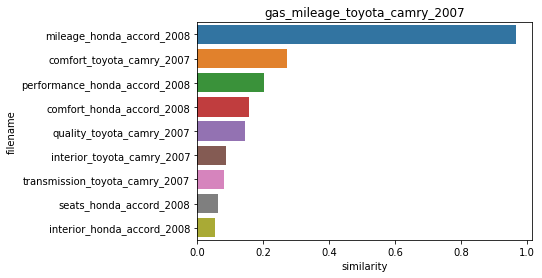

In [59]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:,1:]

car_sorted_indexes = car_indexes[sorted_index.reshape(-1)]

car_1_value = np.sort(similarity_pair.reshape(-1))[::-1]
car_1_value = car_1_value[1:]

car_1_df = pd.DataFrame()
car_1_df['filename'] = document_df.iloc[car_sorted_indexes]['filename']
car_1_df['similarity'] = car_1_value

sns.barplot(x='similarity', y='filename', data=car_1_df)
plt.title(comparison_docname)